Accuracy on evaluation set: 0.8300


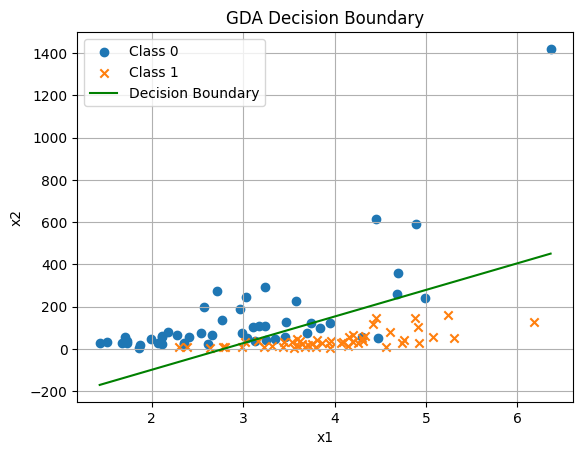

In [ ]:
import numpy as np
import util

from linear_model import LinearModel
import ps1_b.ipynb as ps1_b
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt

def plot_decision_boundary(x, y, theta):
    plt.figure()

    # Plot data points
    plt.scatter(x[y==0][:, 0], x[y==0][:, 1], label="Class 0", marker='o')
    plt.scatter(x[y==1][:, 0], x[y==1][:, 1], label="Class 1", marker='x')

    # Plot decision boundary: θ₀ + θ₁x₁ + θ₂x₂ = 0  ⇒ x₂ = -(θ₀ + θ₁x₁) / θ₂
    x1_vals = np.linspace(np.min(x[:,0]), np.max(x[:,0]), 100)
    theta_0, theta_1, theta_2 = theta
    x2_vals = -(theta_0 + theta_1 * x1_vals) / theta_2
    plt.plot(x1_vals, x2_vals, label="Decision Boundary", color='green')

    plt.xlabel("x1")
    plt.ylabel("x2")
    plt.legend()
    plt.title("GDA Decision Boundary")
    plt.grid(True)
    plt.show()


class GDA(LinearModel):
    """Gaussian Discriminant Analysis.

    Example usage:
        > clf = GDA()
        > clf.fit(x_train, y_train)
        > clf.predict(x_eval)
    """

    def fit(self, x, y):
        """Fit a GDA model to training set given by x and y.

        Args:
            x: Training example inputs. Shape (m, n).
            y: Training example labels. Shape (m,).

        Returns:
            theta: GDA model parameters.
        """
        # *** START CODE HERE ***
        phi = np.mean(y)
        mu_0 = np.mean(x[y == 0], axis=0)
        mu_1 = np.mean(x[y == 1], axis=0)
        cov_matrix = np.zeros((x.shape[1], x.shape[1]))
        for i in range(x.shape[0]):
            if y[i] == 0:
                cov_matrix += np.outer(x[i] - mu_0, x[i] - mu_0)
            else:
                cov_matrix += np.outer(x[i] - mu_1, x[i] - mu_1)
        cov_matrix /= x.shape[0]
        inverse_cov = np.linalg.inv(cov_matrix)

        theta_0 = -((mu_1.T) @ inverse_cov @ mu_1)/2 + (mu_0.T @ inverse_cov @ mu_0)/2 + np.log(phi / (1 - phi))

        theta = inverse_cov @ (mu_1 - mu_0)

        theta = np.concatenate(([theta_0], theta))
        self.theta = theta



        # *** END CODE HERE ***

    def predict(self, x):
        """Make a prediction given new inputs x.

        Args:
            x: Inputs of shape (m, n).

        Returns:
            Outputs of shape (m,).
        """
        # *** START CODE HERE ***
        if self.theta is None:
            raise ValueError("Model has not been fitted yet. Call fit() before predict().")
        x_new = np.concatenate([np.ones((x.shape[0], 1)), x], axis=1)
        return x_new @ self.theta >= 0

        # *** END CODE HERE
def main(train_path, eval_path, pred_path):
    # Load dataset
    x_train, y_train = util.load_dataset(train_path, add_intercept=False)
    

    # *** START CODE HERE ***
    x_eval, y_eval = util.load_dataset(eval_path, add_intercept=False)

    clf = GDA()
    clf.fit(x_train, y_train)
    y_pred = clf.predict(x_eval)
    np.savetxt(pred_path, y_pred)


    acc = accuracy_score(y_eval, y_pred)
    print(f"Accuracy on evaluation set: {acc:.4f}")

    if x_eval.shape[1] == 2:
        plot_decision_boundary(x_eval, y_eval, clf.theta)


    # *** END CODE HERE ***
    
if __name__ == "__main__":
    main("data/ds1_train.csv", "data/ds1_valid.csv", "output/predictions.txt")